In [1]:
from data import create_dummy_data
from gse import GSE

from plot_ultils import create_domain_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import sklearn

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.__version__, sklearn.__version__, pd.__version__

('1.19.4', '1.0.1', '1.3.4')

In [8]:
X_maj, X_min = create_dummy_data(200, ir=4)
X_total = np.concatenate([X_maj, X_min], 0)
labels = np.concatenate([np.zeros(X_maj.shape[0]),np.ones(X_min.shape[0])], 0)

X_train, X_test, y_train, y_test = train_test_split(X_total, labels, test_size=0.3, random_state=42)

X_maj = X_train[y_train==0]
X_min = X_train[y_train==1]

gse_learner = GSE(P=2, R=1.0)
classifiers = gse_learner.fit(X_maj, X_min)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80        49
           1       0.33      0.64      0.44        11

    accuracy                           0.70        60
   macro avg       0.62      0.68      0.62        60
weighted avg       0.79      0.70      0.73        60



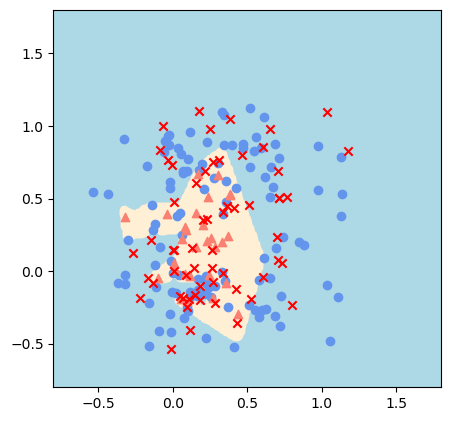

In [11]:
pred = gse_learner.predict(X_test)
print(classification_report(y_test, pred, labels=[0, 1]))

fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
plt.xlim([-0.8, 1.8])
plt.ylim([-0.8, 1.8])
maj_domain, min_domain = create_domain_plot(classifiers, -0.8, 1.8)
plt.scatter(maj_domain[:,0], maj_domain[:,1], marker="o",c="lightblue")
plt.scatter(min_domain[:,0], min_domain[:,1], marker="o",c="papayawhip")
plt.scatter(X_maj[:,0], X_maj[:,1], marker="o",c="cornflowerblue")
plt.scatter(X_min[:,0], X_min[:,1], marker="^",c="salmon")
plt.scatter(X_test[:,0], X_test[:,1], marker="x",c="red")
plt.show()

In [6]:
df = pd.read_csv('./data/ecoli3.csv')
labels = np.array([1 if x == "positive" else 0 for x in df["Class"].values])
df = df.drop(columns=["Class"])
X_total = df.values
X_train, X_test, y_train, y_test = train_test_split(X_total, labels, test_size=0.3, random_state=42)
X_maj = X_train[y_train==0]
X_min = X_train[y_train==1]
gse_learner = GSE(P=2, R=1.0)
classifiers = gse_learner.fit(X_maj, X_min)
pred = gse_learner.predict(X_test)
print(classification_report(y_test, pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        87
           1       0.73      0.79      0.76        14

    accuracy                           0.93       101
   macro avg       0.85      0.87      0.86       101
weighted avg       0.93      0.93      0.93       101

